# PyMaceuticals

* Based on visual assessment of the intital plots, sujects in Capomulin and Ramicane treatment groups improves over the course on the study period, while subjects in other treatment groups, including the placebo, declined.
* Additional statistical testing can determine if the visual differences in drug perfomance are significant.  
* More detailed assessment of plots is provided within code.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [2]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_trial_data = pd.merge(trial_data, mouse_data, on = "Mouse ID", how = "outer")

# Display the data table for preview
mouse_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint & Convert to DataFrame
mouse_trial_grouped = mouse_trial_data.groupby(["Drug","Timepoint"])
mean_tumor_vol = pd.DataFrame(mouse_trial_grouped["Tumor Volume (mm3)"].mean())
mean_tumor_vol = mean_tumor_vol.reset_index(drop = False)

# Preview DataFrame
mean_tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint &Convert to DataFrame
mouse_trial_grouped = mouse_trial_data.groupby(["Drug","Timepoint"])
sem_tumor_vol = pd.DataFrame(mouse_trial_grouped["Tumor Volume (mm3)"].sem())
sem_tumor_vol = sem_tumor_vol.reset_index(drop = False)

# Preview DataFrame
sem_tumor_vol.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
#create a list of treatment drugs and store the dimension of the x and y variables
drug_list = mean_tumor_vol["Drug"].unique()
time_list = mean_tumor_vol["Timepoint"].unique()
drug_lim = len(drug_list)
time_lim = len(time_list)

#convert the listed mean data into a dataframe matrix
mouse_mean_munge = pd.DataFrame([[mean_tumor_vol.iloc[d*10 + t, 2] for t in range(0, time_lim)] for d in range(0, drug_lim)])
#assign the drugs names to the results
mouse_mean_munge_df = pd.DataFrame({drug_list[i] : mouse_mean_munge.iloc[i,:] for i in range(0, drug_lim)})
#add a column identifying the timepoint for each row of data
mouse_mean_munge_df["Timepoint"] = time_list 
mouse_mean_munge_df = mouse_mean_munge_df.set_index("Timepoint")

#convert the listed standard error data into a dataframe matrix
mouse_sem_munge = pd.DataFrame([[sem_tumor_vol.iloc[d*10 + t, 2] for t in range(0, time_lim)] for d in range(0, drug_lim)])
#assign the drugs names to the results
mouse_sem_munge_df = pd.DataFrame({drug_list[i] : mouse_sem_munge.iloc[i,:] for i in range(0, drug_lim)})
#add a column identifying the timepoint for each row of data
mouse_sem_munge_df["Timepoint"] = time_list 
mouse_sem_munge_df = mouse_sem_munge_df.set_index("Timepoint")

# Preview that Reformatting worked
mouse_mean_munge_df


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


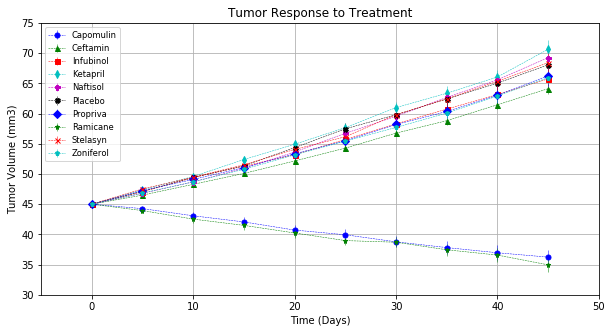

<Figure size 432x288 with 0 Axes>

In [6]:
#name the output of subplots and define the size of output so that the plot is easy to read
fig_vol, ax_vol = plt.subplots(figsize = (10,5))

#define a list of formats to plug in so the 10 treatment types can be differentiated
fmt_list = ["o","^","s","d","P","X","D","*","x","p"]
color_list = ["b","g","r","c","m","y","b","g","r","c"]

#loop through the drug list, plotting the mean and standard error bars at each time point
i = 0
for d in drug_list:
    colori = color_list[i]
    #ensure that the Placebo stands out from the other treatments for easy comparison
    if d == "Placebo":
        colori = "k"
    ax_vol.errorbar(time_list, mouse_mean_munge_df[d], yerr=mouse_sem_munge_df[d], fmt=fmt_list[i], 
                    color=colori, ls = "--", label=d, ms = 5, lw = 0.5)
    i += 1

#add titles, axis labels, axis limits, grid, and legend
ax_vol.set_title("Tumor Response to Treatment")
ax_vol.set_xlabel("Time (Days)")
ax_vol.set_ylabel("Tumor Volume (mm3)")
plt.xlim(-5,50)
plt.ylim(30, 75)
plt.grid()
plt.legend(loc="best", fontsize="small", fancybox=True)


#show figure
plt.show()

# Save the Figure
plt.savefig("Tumor Response.png")

#  Tumor Volume Analysis

* The plot of changes in tumor volume over the 45 days of treatment indicate that subjects receiving Capomulin and Ramicane experienced a decrease in tumor volume, while subjects receiving the other treatments, including the placebo, had an increase in tumor volume.


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#mouse_trial_grouped = mouse_trial_data.groupby(["Drug","Timepoint"])
mean_tumor_met = pd.DataFrame(mouse_trial_grouped["Metastatic Sites"].mean())

# Preview DataFrame
mean_tumor_met.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_tumor_met = pd.DataFrame(mouse_trial_grouped["Metastatic Sites"].sem())

# Preview DataFrame
sem_tumor_met.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames

#convert the listed mean data into a dataframe matrix
met_mean_munge = pd.DataFrame([[mean_tumor_met.iloc[d*10 + t, 0] for t in range(0, time_lim)] for d in range(0, drug_lim)])
#assign the drugs names to the results
met_mean_munge_df = pd.DataFrame({drug_list[i] : met_mean_munge.iloc[i,:] for i in range(0, drug_lim)})
#add a column identifying the timepoint for each row of data
met_mean_munge_df["Timepoint"] = time_list 
met_mean_munge_df = met_mean_munge_df.set_index("Timepoint")

#convert the listed standard error data into a dataframe matrix
met_sem_munge = pd.DataFrame([[sem_tumor_met.iloc[d*10 + t, 0] for t in range(0, time_lim)] for d in range(0, drug_lim)])
#assign the drugs names to the results
met_sem_munge_df = pd.DataFrame({drug_list[i] : met_sem_munge.iloc[i,:] for i in range(0, drug_lim)})
#add a column identifying the timepoint for each row of data
met_sem_munge_df["Timepoint"] = time_list 
met_sem_munge_df = met_sem_munge_df.set_index("Timepoint")

# Preview that Reformatting worked
met_mean_munge_df

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


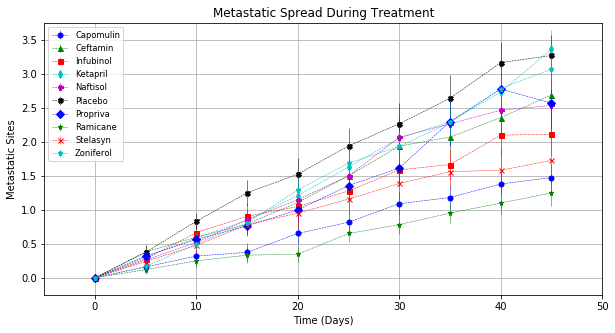

<Figure size 432x288 with 0 Axes>

In [10]:
#name the output of subplots and define the size of output so that the plot is easy to read
fig_met, ax_met = plt.subplots(figsize = (10,5))

#define a list of formats to plug in so the 10 treatment types can be differentiated
fmt_list = ["o","^","s","d","P","X","D","*","x","p"]
color_list = ["b","g","r","c","m","y","b","g","r","c"]

#loop through the drug list, plotting the mean and standard error bars at each time point
i = 0
for d in drug_list:
    colori = color_list[i]
    #ensure that the Placebo stands out from the other treatments for easy comparison
    if d == "Placebo":
        colori = "k"
    ax_met.errorbar(time_list, met_mean_munge_df[d], yerr=met_sem_munge_df[d], fmt=fmt_list[i], 
                    color=colori, ls = "--", label=d, ms = 5, lw = 0.5)
    i += 1
    
#add titles, axis labels, axis limits, grid, and legend
ax_met.set_title("Metastatic Spread During Treatment")
ax_met.set_xlabel("Time (Days)")
ax_met.set_ylabel("Metastatic Sites")
plt.xlim(-5,50)
plt.ylim(-0.25, 3.75)
plt.grid()
plt.legend(loc="best", fontsize="small", fancybox=True)


#show figure
plt.show()

# Save the Figure
plt.savefig("Metastatic Spread.png")

#  Metastatic Site Analysis

* The average number of metastatic sites for all treatment options increased over the 45 days treatment period.  
* The average number of metastatic sites tended to be higher for the placebo group.  
* The treatments that showed strong performance based on change in tumor volume size, Capomulin and Ramicane, had the lower average numbers of metastatic sites during the study, but the visual separation in performance is not as distinct based on this metric.  The standard error of Capomulin overlaps with the standard error of Stelasyn at times.    


## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_tumor_met = pd.DataFrame(mouse_trial_grouped["Metastatic Sites"].count())

# Preview DataFrame
count_tumor_met.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                        25
          5                        25
          10                       25
          15                       24
          20                       23

In [12]:
# Minor Data Munging to Re-Format the Data Frames

#convert the listed mean data into a dataframe matrix
met_count_munge = pd.DataFrame([[count_tumor_met.iloc[d*10 + t, 0] for t in range(0, time_lim)] for d in range(0, drug_lim)])
#assign the drugs names to the results
met_count_munge_df = pd.DataFrame({drug_list[i] : met_count_munge.iloc[i,:] for i in range(0, drug_lim)})
#add a column identifying the timepoint for each row of data
met_count_munge_df["Timepoint"] = time_list 
met_count_munge_df = met_count_munge_df.set_index("Timepoint")

#calculate the Percent surviving by dividing each count by the start value
met_pct = met_count_munge_df/met_count_munge_df.iloc[0,:]*100

# Preview the Data Frame
met_pct

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


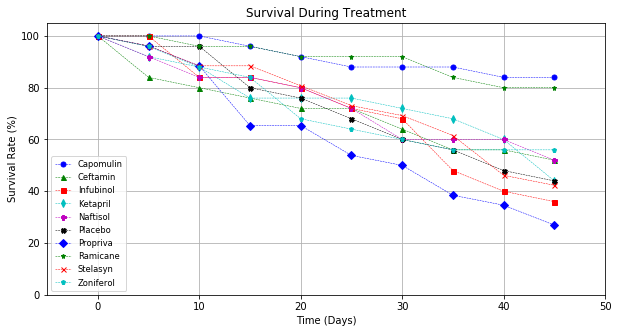

<Figure size 432x288 with 0 Axes>

In [13]:
#name the output of subplots and define the size of output so that the plot is easy to read
fig_count, ax_count = plt.subplots(figsize = (10,5))

#define a list of formats to plug in so the 10 treatment types can be differentiated
fmt_list = ["o","^","s","d","P","X","D","*","x","p"]
color_list = ["b","g","r","c","m","y","b","g","r","c"]

#loop through the drug list, plotting the mean at each time point
i = 0
for d in drug_list:
    colori = color_list[i]
    #ensure that the Placebo stands out from the other treatments for easy comparison
    if d == "Placebo":
        colori = "k"
    ax_count.plot(time_list, met_pct[d], marker=fmt_list[i], 
                    color = colori, ls = "--", label=d, ms = 5, lw = 0.5)
    i += 1
    
#add titles, axis labels, axis limits, grid, and legend
ax_count.set_title("Survival During Treatment")
ax_count.set_xlabel("Time (Days)")
ax_count.set_ylabel("Survival Rate (%)")
plt.xlim(-5,50)
plt.ylim(0, 105)
plt.grid()
plt.legend(loc="best", fontsize="small", fancybox=True)

#show figure
plt.show()

# Save the Figure
plt.savefig("Survival During Treatment.png")

#  Survival Rate Analysis

* Survival rates for the duration of treatment were higher for Capomulin and Ramicane, which was at or above 80% at the conculsion of the study.  
* Based on a visual assessment, the survival rates for other treatments was not distinctly different from the placebo.    


## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
pct_chg = (mouse_mean_munge_df.iloc[9,:] - mouse_mean_munge_df.iloc[0,:])/mouse_mean_munge_df.iloc[0,:]*100

# Display the data to confirm
pct_chg

Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

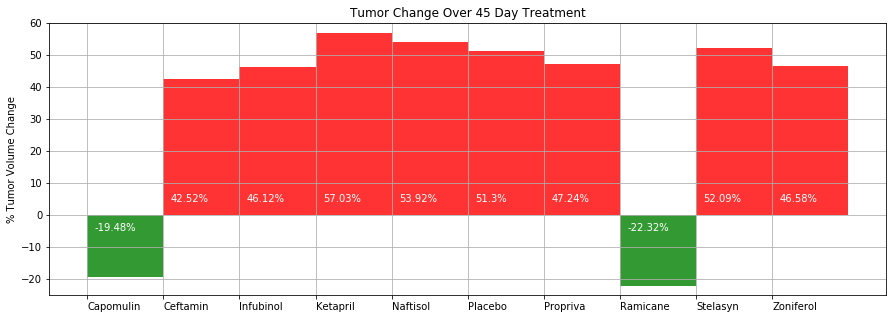

In [15]:
#name the output of subplots and define the size of output so that the plot is easy to read
fig_bar, ax_bar = plt.subplots(figsize = (15,5))

# Splice the data between passing and failing drugs
passing = pct_chg[pct_chg < 0]
failing = pct_chg[pct_chg >= 0]

#define axes for the separate lists of passing and failing so the alphabetical order of the drug list can be maintained
#an array indicating positive or negative values assists in conditional formatting
pass_axis = []
fail_axis = []
both_axis = []
i = 0
for d in drug_list:
    if pct_chg[i] < 0:
        pass_axis.append(i)
        both_axis.append(-1)
    else:
        fail_axis.append(i)
        both_axis.append(1)
    i += 1

#plot the results for passing and failing drugs in the same chart. 
ax_bar.bar(pass_axis, passing, color='g', alpha=0.8, align="edge",width = 1)
ax_bar.bar(fail_axis, failing, color='r', alpha=0.8, align="edge",width = 1)

# Tidy up the chart by adding axis label, title, and labeling drugs on the x-axis 
ax_bar.set_title("Tumor Change Over 45 Day Treatment")
ax_bar.set_ylabel("% Tumor Volume Change")
plt.ylim(-25,60)
plt.grid()
plt.xticks(np.arange(len(drug_list)), drug_list, ha = "left")


# Dispaly the value of each bar within the bar, location of annotation varies based on the order of the drug in the list
# and whether the value is positive or negative.
for n in range(len(both_axis)):
    if both_axis[n] < 0:
        n_xy = (n+0.1,-5)
        n_xytext = (n+0.1,-5)
    else:
        n_xy = (n+0.1, 4)
        n_xytext = (n+0.1, 4)
    plt.annotate((str(round(pct_chg[n],2)) + "%"), xy = n_xy, xytext = n_xytext, color = "w")

# Show the Figure
fig_bar.show()


# Save the Figure
plt.savefig("Tumor Perent Change.png")

#  Change in Tumor Volume Analysis

* The percent change in tumor volume over the period of the study also indicates that Capomulin and Ramicane are the only treatment drugs that resulted in a decrease in tumor size. 
* T-tests of the percent change across the samples in each treatment group against the placebo could indicate whether the of tumor growth of other treament drugs is statistically different from that of the placebo group.  
